# Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the Data for ML Project

In [70]:
df=pd.read_csv('TelcoChurn.csv')

In [71]:
df.shape

(7043, 21)

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [74]:
pd.set_option('display.max_columns',None)

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# How many rows have missing ID ?

In [77]:
df['customerID'].isnull().sum()

0

# Drop ID Feature from the dataset

In [78]:
df=df.drop(['customerID'],axis=1)

# Label the Churn feature to 1/0

In [79]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [80]:
df['target']= np.where(df['Churn']=="Yes",1,0)

# Drop the Churn feature to retain only Target 

In [81]:
df=df.drop(['Churn'],axis=1)

# Defining Target and Independent Features

In [82]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [83]:
Y.mean()

target    0.26537
dtype: float64

# Split features into Numerical and Categorical

In [84]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [85]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [86]:
#Check whether SeniorCitizon feaure is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [87]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Dropping the indicator features from num to build a separate DF

In [88]:
ind = num.iloc[:,0].to_frame()
#num=num.drop(['SeniorCitizen'],axis=1)

In [89]:
ind

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [90]:
num=num.drop(['SeniorCitizen'],axis=1)

In [91]:
num

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


# Outlier Analysis of Numerical Features

In [92]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
tenure,7043.0,32.371149,24.559481,0.00,0.00,1.000,1.00,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.200,19.65,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,18.80,19.871,49.07,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6921.025,8039.256,8684.80


# Capping and Flooring of outliers

In [93]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [94]:
num=num.apply(lambda x : outlier_cap(x))

In [95]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,85%,90%,99%,max
tenure,7043.0,32.372710,24.557454,1.00,1.00,1.000,2.00,9.00,29.00,55.00,65.000,69.00,72.000,72.000
MonthlyCharges,7043.0,64.566357,29.747902,19.65,19.65,19.650,20.05,35.50,70.35,89.85,98.550,102.60,107.400,107.400
TotalCharges,7043.0,2246.127358,2185.556691,49.07,49.07,49.088,83.47,398.55,1394.55,3786.60,5195.485,5973.69,6921.025,6921.025


# Missing Value Analysis

In [96]:
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [97]:
# Since the data does not contain any missing values Imputation Processes are not required

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [98]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [99]:
num_1

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,49.070
1,34.0,56.95,1889.500
2,2.0,53.85,108.150
3,45.0,42.30,1840.750
4,2.0,70.70,151.650
...,...,...,...
7038,24.0,84.80,1990.500
7039,72.0,103.20,6921.025
7040,11.0,29.60,346.450
7041,4.0,74.40,306.600


In [100]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      49.07
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [101]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


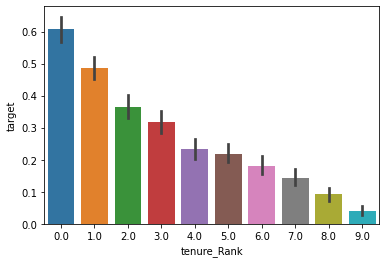

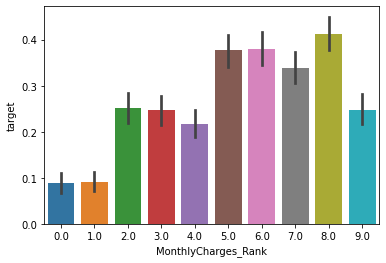

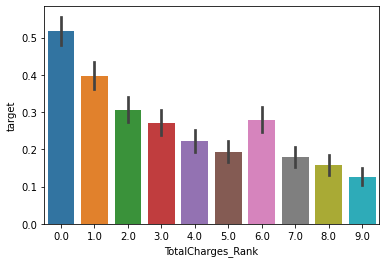

In [102]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [103]:
# All features from num_2 will get selected due to good discrimination
select_features_df_num=num_1

In [104]:
num_1.shape

(7043, 3)

# Feature Selection - Categorical Features 

In [105]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Part 1 - Bi Variate Analysis

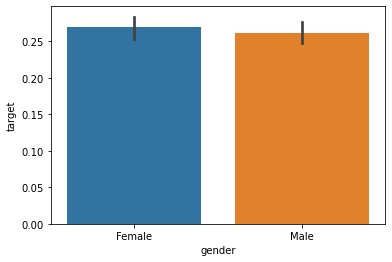

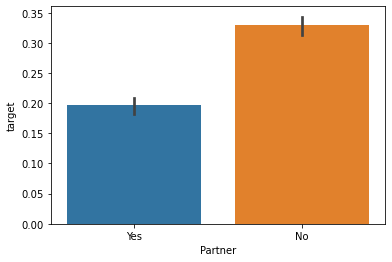

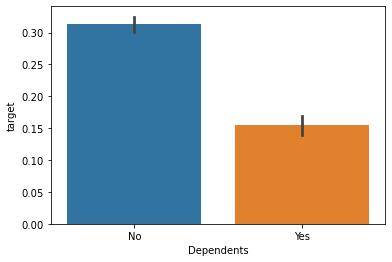

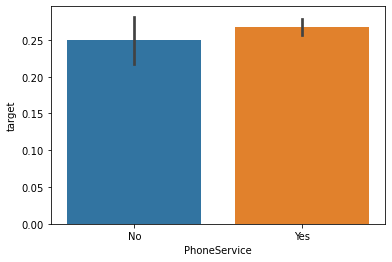

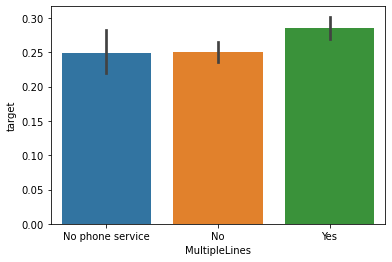

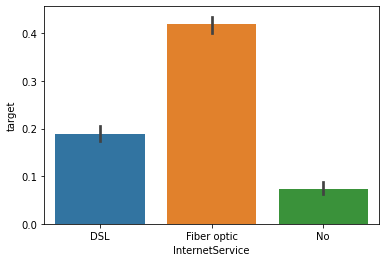

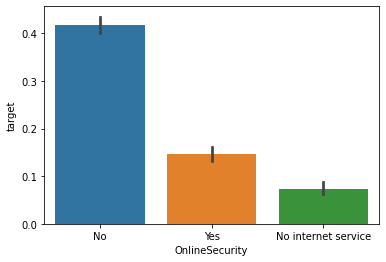

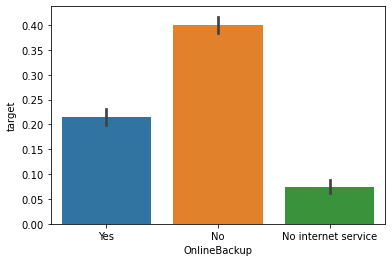

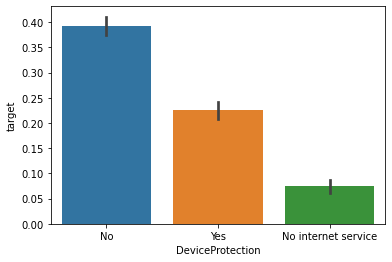

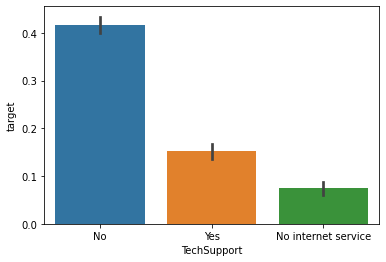

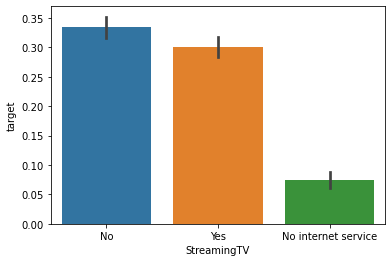

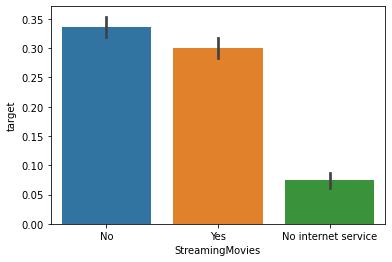

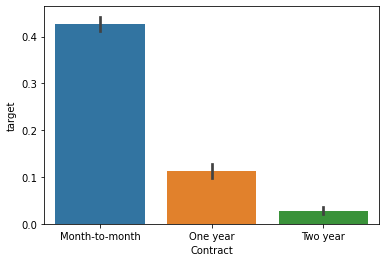

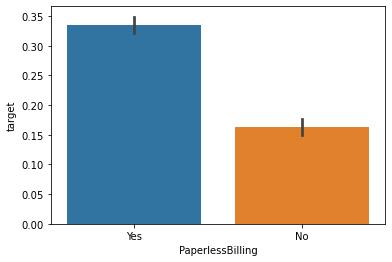

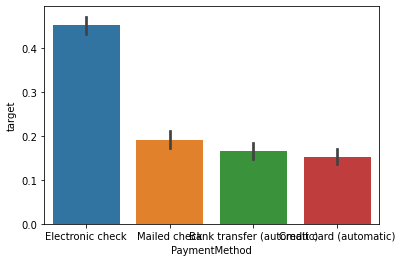

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [107]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [108]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

In [109]:
X_char_dum

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Part 2 - Select K Best

In [40]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [85]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

# Feature Selection - Numerical Indicator Features 

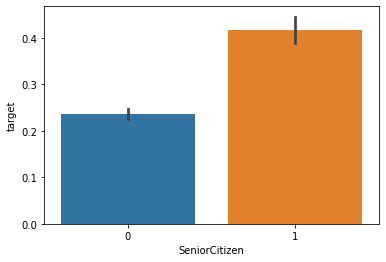

In [41]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [42]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [43]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [44]:
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1.0,29.85,49.070,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,34.0,56.95,1889.500,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2.0,53.85,108.150,0
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,45.0,42.30,1840.750,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2.0,70.70,151.650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,24.0,84.80,1990.500,0
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,72.0,103.20,6921.025,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,11.0,29.60,346.450,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,74.40,306.600,1


In [45]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

# Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [47]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data target    0.266126
dtype: float64
Response Rate in Testing Data target    0.263606
dtype: float64


In [48]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [49]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [50]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,-0.020599
1,Dependents_Yes,-0.163553
2,InternetService_Fiber optic,0.502036
3,InternetService_No,-0.141661
4,OnlineSecurity_No internet service,-0.141661
5,OnlineSecurity_Yes,-0.556354
6,OnlineBackup_No internet service,-0.141661
7,OnlineBackup_Yes,-0.269213
8,DeviceProtection_No internet service,-0.141661
9,DeviceProtection_Yes,-0.114987


In [51]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [52]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [53]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [57]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=4812d279d01b16c11809c291dd8ac0bdaddd3c8d3b599911884d7672b94ff581
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


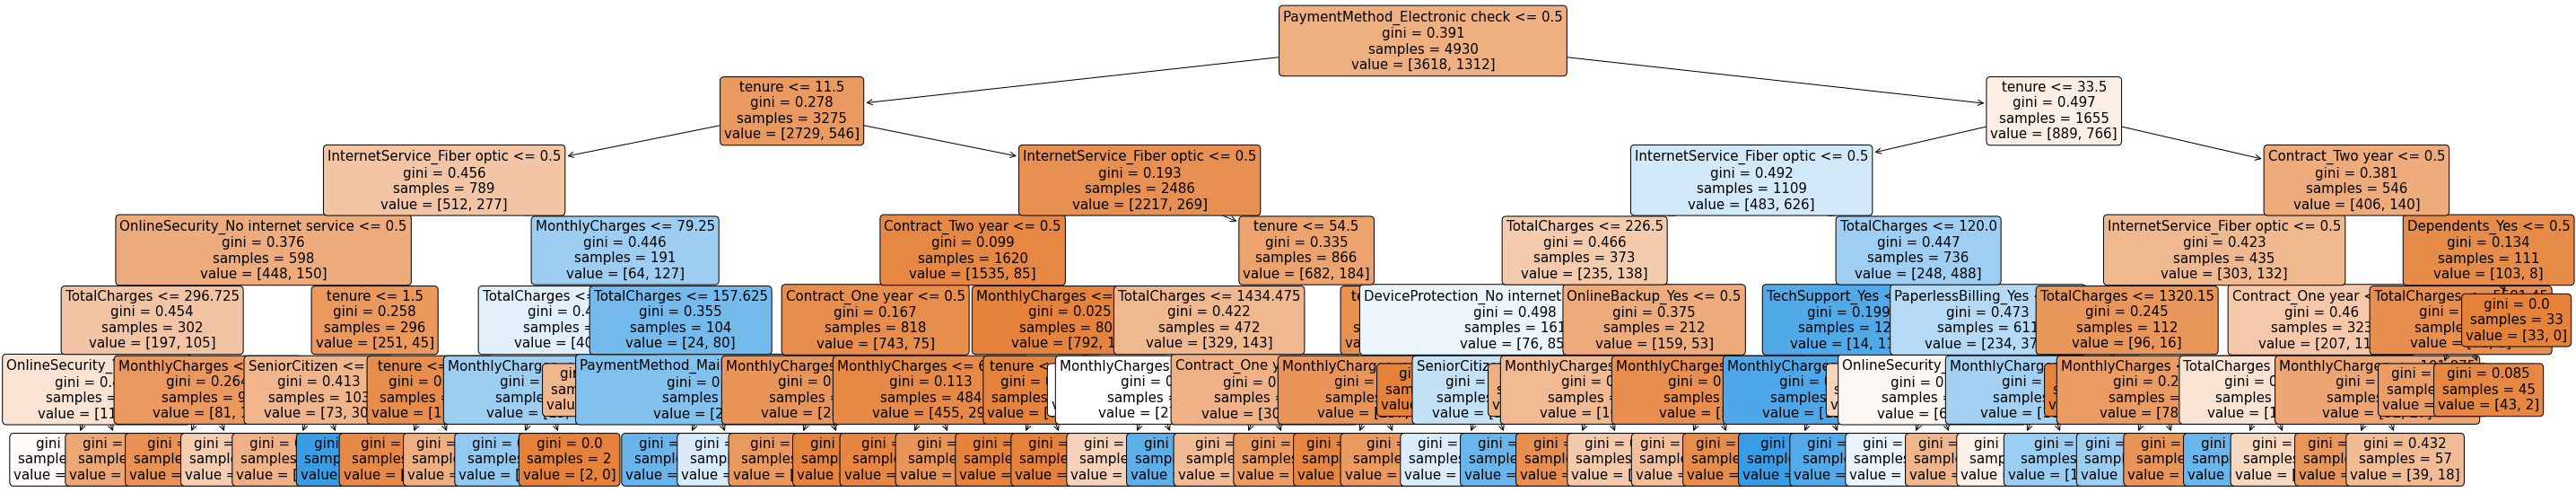

In [58]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [59]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [60]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.202032
TotalCharges,0.142111
InternetService_Fiber optic,0.116127
PaymentMethod_Electronic check,0.088409
MonthlyCharges,0.083951
Contract_Two year,0.076683
OnlineSecurity_Yes,0.038407
Contract_One year,0.036622
InternetService_No,0.028763
TechSupport_Yes,0.028533


In [61]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [62]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.213507
MonthlyCharges,0.179055
TotalCharges,0.166430
PaymentMethod_Electronic check,0.135038
InternetService_Fiber optic,0.128282
Contract_Two year,0.035086
Contract_One year,0.033599
PaperlessBilling_Yes,0.019744
OnlineSecurity_Yes,0.016785
TechSupport_Yes,0.014640


In [63]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [64]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [65]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [66]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [67]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [68]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.8007572172266919
Precision 0.646551724137931
Recall 0.5385996409335727
f1_score 0.5876591576885407


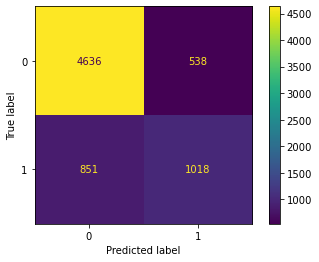

In [69]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [70]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7950780880265026
Precision 0.6483253588516746
Recall 0.4865350089766607
f1_score 0.5558974358974359


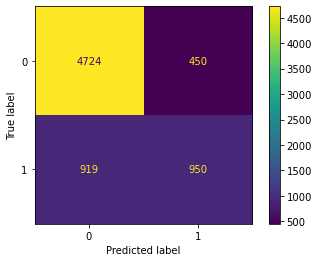

In [71]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [72]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7998106956933271
Precision 0.6700507614213198
Recall 0.473967684021544
f1_score 0.5552050473186119


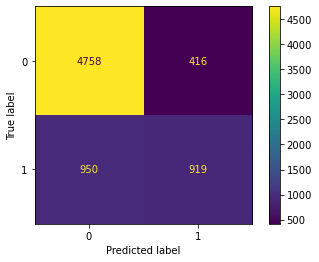

In [73]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [74]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7998106956933271
Precision 0.6437768240343348
Recall 0.5385996409335727
f1_score 0.5865102639296188


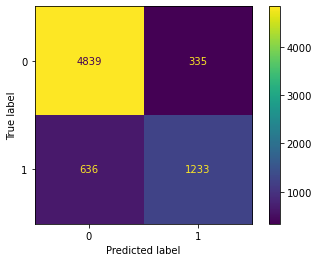

In [75]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [76]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.7988641741599621
Precision 0.6527777777777778
Recall 0.5062836624775583
f1_score 0.570273003033367


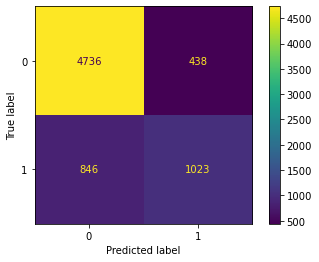

In [77]:
metrics.plot_confusion_matrix(clf,X_all,Y)

In [78]:
# Lorenz Curve

In [79]:
# Logistic Lorenz Curve

In [80]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.744681,0.742193,525.0,525.0,0.280899,0.280899,180.0,180.0,0.034789,0.034789,0.2461,0.100099,0.100099,1
1,9,704,0.580966,0.596402,409.0,934.0,0.218834,0.499732,295.0,475.0,0.057016,0.091805,0.4079,0.099957,0.200057,2
2,8,704,0.457386,0.457111,322.0,1256.0,0.172285,0.672017,382.0,857.0,0.073831,0.165636,0.5064,0.099957,0.300014,3
3,7,704,0.299716,0.326399,211.0,1467.0,0.112895,0.784912,493.0,1350.0,0.095284,0.260920,0.5240,0.099957,0.399972,4
4,6,704,0.234375,0.224245,165.0,1632.0,0.088283,0.873194,539.0,1889.0,0.104175,0.365095,0.5081,0.099957,0.499929,5
5,5,705,0.156028,0.151865,110.0,1742.0,0.058855,0.932049,595.0,2484.0,0.114998,0.480093,0.4520,0.100099,0.600028,6
6,4,704,0.071023,0.092852,50.0,1792.0,0.026752,0.958801,654.0,3138.0,0.126401,0.606494,0.3523,0.099957,0.699986,7
7,3,704,0.068182,0.050773,48.0,1840.0,0.025682,0.984484,656.0,3794.0,0.126788,0.733282,0.2512,0.099957,0.799943,8
8,2,704,0.026989,0.023207,19.0,1859.0,0.010166,0.994650,685.0,4479.0,0.132393,0.865675,0.1290,0.099957,0.899901,9
9,1,705,0.014184,0.006598,10.0,1869.0,0.005350,1.000000,695.0,5174.0,0.134325,1.000000,0.0000,0.100099,1.000000,10


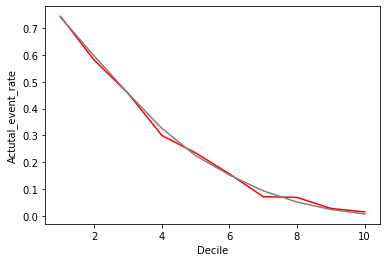

In [81]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [82]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.756028,0.772067,533.0,533.0,0.285179,0.285179,172.0,172.0,0.033243,0.033243,0.2519,0.100099,0.100099,1
1,9,704,0.596591,0.608344,420.0,953.0,0.224719,0.509898,284.0,456.0,0.054890,0.088133,0.4218,0.099957,0.200057,2
2,8,704,0.417614,0.435819,294.0,1247.0,0.157303,0.667202,410.0,866.0,0.079242,0.167375,0.4998,0.099957,0.300014,3
3,7,704,0.326705,0.322880,230.0,1477.0,0.123060,0.790262,474.0,1340.0,0.091612,0.258987,0.5313,0.099957,0.399972,4
4,6,704,0.215909,0.209595,152.0,1629.0,0.081327,0.871589,552.0,1892.0,0.106687,0.365675,0.5059,0.099957,0.499929,5
5,5,705,0.160284,0.154631,113.0,1742.0,0.060460,0.932049,592.0,2484.0,0.114418,0.480093,0.4520,0.100099,0.600028,6
6,4,704,0.110795,0.098992,78.0,1820.0,0.041734,0.973783,626.0,3110.0,0.120990,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.041193,0.037890,29.0,1849.0,0.015516,0.989299,675.0,3785.0,0.130460,0.731542,0.2578,0.099957,0.799943,8
8,2,704,0.017045,0.016893,12.0,1861.0,0.006421,0.995720,692.0,4477.0,0.133746,0.865288,0.1304,0.099957,0.899901,9
9,1,705,0.011348,0.003096,8.0,1869.0,0.004280,1.000000,697.0,5174.0,0.134712,1.000000,-0.0000,0.100099,1.000000,10


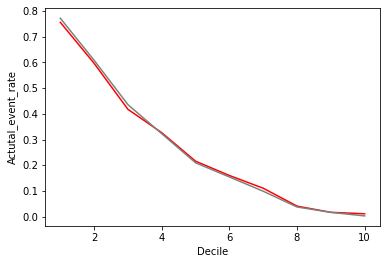

In [83]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [84]:
# Random Forest Lorenz Curve

In [85]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.768794,0.683240,542.0,542.0,0.289995,0.289995,163.0,163.0,0.031504,0.031504,0.2585,0.100099,0.100099,1
1,9,704,0.596591,0.542220,420.0,962.0,0.224719,0.514714,284.0,447.0,0.054890,0.086394,0.4283,0.099957,0.200057,2
2,8,704,0.451705,0.426840,318.0,1280.0,0.170144,0.684858,386.0,833.0,0.074604,0.160997,0.5239,0.099957,0.300014,3
3,7,704,0.316761,0.317997,223.0,1503.0,0.119315,0.804173,481.0,1314.0,0.092965,0.253962,0.5502,0.099957,0.399972,4
4,6,704,0.225852,0.242626,159.0,1662.0,0.085072,0.889246,545.0,1859.0,0.105334,0.359296,0.5299,0.099957,0.499929,5
5,5,705,0.124823,0.180473,88.0,1750.0,0.047084,0.936330,617.0,2476.0,0.119250,0.478547,0.4578,0.100099,0.600028,6
6,4,704,0.099432,0.127391,70.0,1820.0,0.037453,0.973783,634.0,3110.0,0.122536,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.051136,0.080691,36.0,1856.0,0.019262,0.993044,668.0,3778.0,0.129107,0.730189,0.2629,0.099957,0.799943,8
8,2,704,0.017045,0.038349,12.0,1868.0,0.006421,0.999465,692.0,4470.0,0.133746,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.017752,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


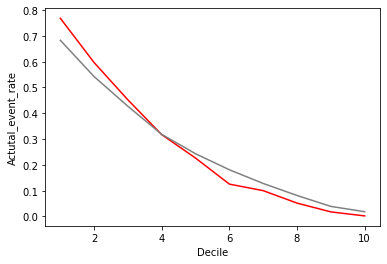

In [86]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [87]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.914894,0.819941,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335,0.100099,0.100099,1
1,9,704,0.698864,0.617973,492.0,1137.0,0.263242,0.608347,212.0,272.0,0.040974,0.052571,0.5558,0.099957,0.200057,2
2,8,704,0.478693,0.451557,337.0,1474.0,0.180310,0.788657,367.0,639.0,0.070932,0.123502,0.6652,0.099957,0.300014,3
3,7,704,0.262784,0.305020,185.0,1659.0,0.098983,0.887640,519.0,1158.0,0.100309,0.223811,0.6638,0.099957,0.399972,4
4,6,704,0.161932,0.194536,114.0,1773.0,0.060995,0.948636,590.0,1748.0,0.114032,0.337843,0.6108,0.099957,0.499929,5
5,5,705,0.059574,0.120531,42.0,1815.0,0.022472,0.971108,663.0,2411.0,0.128141,0.465984,0.5051,0.100099,0.600028,6
6,4,704,0.039773,0.072378,28.0,1843.0,0.014981,0.986089,676.0,3087.0,0.130653,0.596637,0.3895,0.099957,0.699986,7
7,3,704,0.025568,0.035795,18.0,1861.0,0.009631,0.995720,686.0,3773.0,0.132586,0.729223,0.2665,0.099957,0.799943,8
8,2,704,0.008523,0.017916,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.010845,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,0.0000,0.100099,1.000000,10


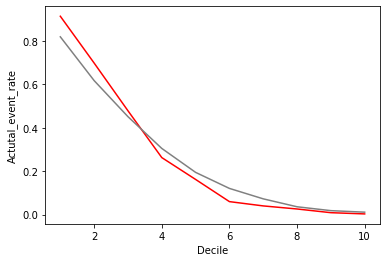

In [88]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [89]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df['pred_prob_stacking']=pd.DataFrame(y_pred_prob)
df['P_Rank_stacking']=pd.qcut(df['pred_prob_stacking'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_stacking')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_stacking')['pred_prob_stacking'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_stacking',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_stacking,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.807092,0.777722,569.0,569.0,0.304441,0.304441,136.0,136.0,0.026285,0.026285,0.2782,0.100099,0.100099,1
1,9,704,0.610795,0.597356,430.0,999.0,0.230070,0.534510,274.0,410.0,0.052957,0.079242,0.4553,0.099957,0.200057,2
2,8,704,0.463068,0.417489,326.0,1325.0,0.174425,0.708935,378.0,788.0,0.073058,0.152300,0.5566,0.099957,0.300014,3
3,7,704,0.318182,0.265995,224.0,1549.0,0.119850,0.828785,480.0,1268.0,0.092772,0.245072,0.5837,0.099957,0.399972,4
4,6,704,0.214489,0.181836,151.0,1700.0,0.080792,0.909577,553.0,1821.0,0.106881,0.351952,0.5576,0.099957,0.499929,5
5,5,705,0.117730,0.130027,83.0,1783.0,0.044409,0.953986,622.0,2443.0,0.120216,0.472169,0.4818,0.100099,0.600028,6
6,4,704,0.073864,0.098060,52.0,1835.0,0.027822,0.981808,652.0,3095.0,0.126015,0.598183,0.3836,0.099957,0.699986,7
7,3,704,0.034091,0.076319,24.0,1859.0,0.012841,0.994650,680.0,3775.0,0.131426,0.729610,0.2650,0.099957,0.799943,8
8,2,704,0.012784,0.060623,9.0,1868.0,0.004815,0.999465,695.0,4470.0,0.134325,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.054433,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,-0.0000,0.100099,1.000000,10


In [90]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting 

# Within the High Value group, we can leverage the model to identify the best targets

In [91]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [92]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [93]:
df['tenure'].mean()

32.37114865824223

In [94]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [95]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [96]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [97]:
df['MonthlyCharges'].mean()

64.76169246059922

In [98]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")

In [99]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=8,"Top 3","Bottom 7")

# Slice the data with respect to Top 4 and Bottom 6 Probability Ranks from the GBM Model

In [100]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]

In [101]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

total=service_list+target

In [102]:
df_top3_services=df_top3[service_list]

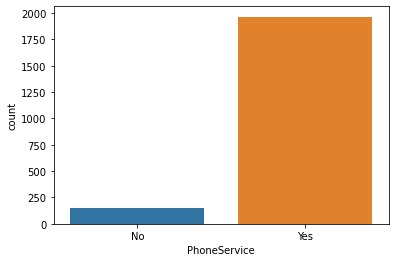

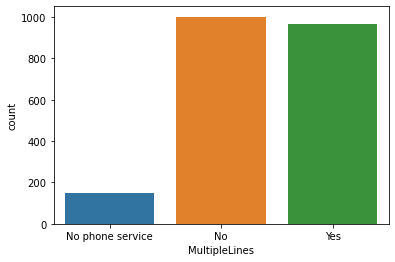

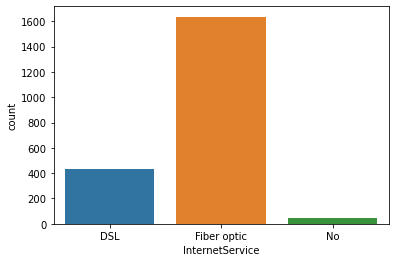

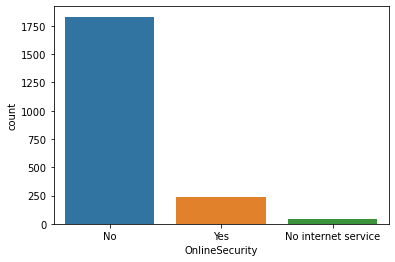

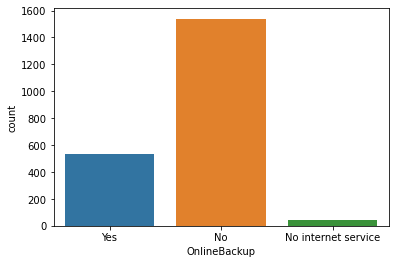

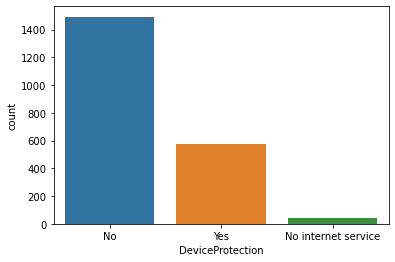

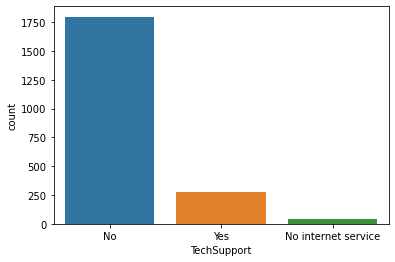

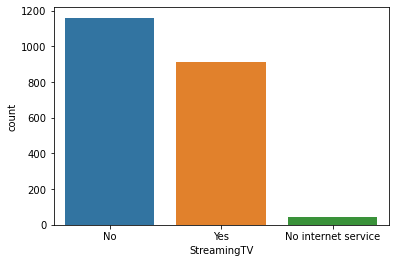

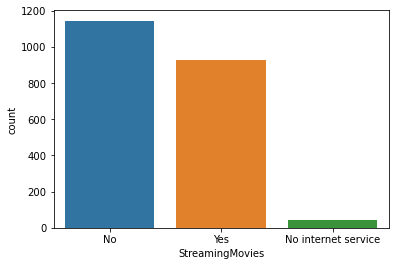

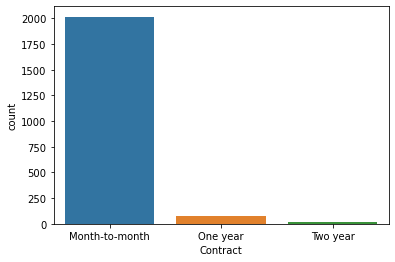

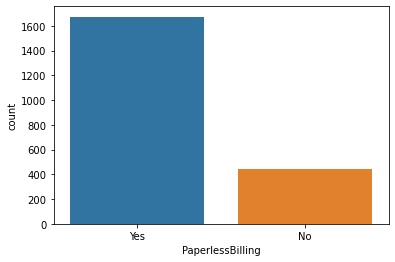

In [103]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [104]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'],aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,99.832524,86.68772
Low Charges,47.358824,48.84717


In [105]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,206,1307
Low Charges,17,583


In [106]:
# Recommendations
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts